# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import csv
from scipy.stats import linregress

#import sys
#!{sys.executable} -m pip install citipy

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
cities[0]

'saint-philippe'

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [12]:
name=[]
cloudiness=[]
country=[]
time=[]
humidity=[]
lat=[]
lon=[]
temp=[]
wind=[]
i=1
url = "http://api.openweathermap.org/data/2.5/weather?"


for city in cities:
    # Build query URL
    query_url = url + "appid=" + weather_api_key + "&q=" + city
    # Get weather data 
    weather_response = requests.get(query_url)
    weather_json = weather_response.json()
    if weather_json['cod']=="404" or weather_json['cod']=="500":
        print("city not found, skipping")
    else:
        print(f"Processing record {i}")
        print(weather_json)
        name.append(city)
        cloudiness.append(weather_json['clouds']['all'])
        country.append(weather_json['sys']['country'])
        time.append(weather_json['dt'])
        humidity.append(weather_json['main']['humidity'])
        lat.append(weather_json['coord']['lat'])
        lon.append(weather_json['coord']['lon'])
        temp.append(weather_json['main']['temp_max'])
        wind.append(weather_json['wind']['speed'])
        i=i+1

weather_dict = {
    "City":name,
    "Cloudiness":cloudiness,
    "Country":country,
    "Date":time,
    "Humidity":humidity,
    "Lat":lat,
    "Lng":lon,
    "Max Temp":temp,
    "Wind Speed":wind
}
print(weather_dict)


Processing record 1
{'coord': {'lon': 55.7679, 'lat': -21.3585}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 297.26, 'feels_like': 295.53, 'temp_min': 292.59, 'temp_max': 300.15, 'pressure': 1012, 'humidity': 74}, 'visibility': 10000, 'wind': {'speed': 7.2, 'deg': 130}, 'rain': {'1h': 0.36}, 'clouds': {'all': 90}, 'dt': 1613319952, 'sys': {'type': 1, 'id': 2127, 'country': 'RE', 'sunrise': 1613268410, 'sunset': 1613314537}, 'timezone': 14400, 'id': 935215, 'name': 'Saint-Philippe', 'cod': 200}
Processing record 2
{'coord': {'lon': -156.7887, 'lat': 71.2906}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 245.15, 'feels_like': 239.86, 'temp_min': 245.15, 'temp_max': 245.15, 'pressure': 1025, 'humidity': 76}, 'visibility': 10000, 'wind': {'speed': 2.06, 'deg': 150}, 'clouds': {'all': 90}, 'dt': 1613319952, 'sys': {'type': 1, 'id

Processing record 17
{'coord': {'lon': -5.2, 'lat': 9.6}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 312.85, 'feels_like': 311.48, 'temp_min': 312.85, 'temp_max': 312.85, 'pressure': 1003, 'humidity': 16, 'sea_level': 1003, 'grnd_level': 969}, 'visibility': 10000, 'wind': {'speed': 1.7, 'deg': 90}, 'clouds': {'all': 12}, 'dt': 1613320198, 'sys': {'country': 'CI', 'sunrise': 1613284833, 'sunset': 1613327378}, 'timezone': 0, 'id': 2289049, 'name': 'Ferkessédougou', 'cod': 200}
Processing record 18
{'coord': {'lon': 102.5, 'lat': 71.9667}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 236.77, 'feels_like': 231.84, 'temp_min': 236.77, 'temp_max': 236.77, 'pressure': 1038, 'humidity': 82, 'sea_level': 1038, 'grnd_level': 1034}, 'visibility': 10000, 'wind': {'speed': 1.43, 'deg': 246}, 'clouds': {'all': 55}, 'dt': 1613320199, 'sys

Processing record 33
{'coord': {'lon': -73.9662, 'lat': 42.6001}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 269.04, 'feels_like': 265.81, 'temp_min': 268.15, 'temp_max': 269.82, 'pressure': 1023, 'humidity': 81}, 'visibility': 9452, 'wind': {'speed': 0.62, 'deg': 36}, 'clouds': {'all': 91}, 'dt': 1613319992, 'sys': {'type': 3, 'id': 2037353, 'country': 'US', 'sunrise': 1613303638, 'sunset': 1613341580}, 'timezone': -18000, 'id': 5106841, 'name': 'Albany', 'cod': 200}
city not found, skipping
Processing record 34
{'coord': {'lon': 57.7575, 'lat': -20.3428}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 299.73, 'feels_like': 302.58, 'temp_min': 299.26, 'temp_max': 300.15, 'pressure': 1013, 'humidity': 78}, 'visibility': 10000, 'wind': {'speed': 2.97, 'deg': 78}, 'rain': {'1h': 0.82}, 'clouds': {'all': 20}, 'dt': 1613319998, '

Processing record 48
{'coord': {'lon': -57.5575, 'lat': -38.0023}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 296.48, 'feels_like': 297.2, 'temp_min': 294.26, 'temp_max': 298.15, 'pressure': 1006, 'humidity': 73}, 'visibility': 10000, 'wind': {'speed': 3.09, 'deg': 70}, 'clouds': {'all': 75}, 'dt': 1613319925, 'sys': {'type': 1, 'id': 8305, 'country': 'AR', 'sunrise': 1613294334, 'sunset': 1613343008}, 'timezone': -10800, 'id': 3430863, 'name': 'Mar del Plata', 'cod': 200}
Processing record 49
{'coord': {'lon': -8.1588, 'lat': 42.0304}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 291.17, 'feels_like': 285.96, 'temp_min': 290.15, 'temp_max': 292.04, 'pressure': 1023, 'humidity': 51}, 'visibility': 10000, 'wind': {'speed': 6.69, 'deg': 190}, 'clouds': {'all': 0}, 'dt': 1613320001, 'sys': {'type': 1, 'id': 6440, 'country': 'PT'

Processing record 64
{'coord': {'lon': 102.2655, 'lat': -3.8004}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 298.25, 'feels_like': 301.99, 'temp_min': 298.25, 'temp_max': 298.25, 'pressure': 1013, 'humidity': 89, 'sea_level': 1013, 'grnd_level': 1011}, 'visibility': 10000, 'wind': {'speed': 2.28, 'deg': 45}, 'clouds': {'all': 100}, 'dt': 1613320003, 'sys': {'country': 'ID', 'sunrise': 1613258298, 'sunset': 1613302331}, 'timezone': 25200, 'id': 1649150, 'name': 'Bengkulu', 'cod': 200}
Processing record 65
{'coord': {'lon': -3, 'lat': 20}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 306.94, 'feels_like': 303.96, 'temp_min': 306.94, 'temp_max': 306.94, 'pressure': 1007, 'humidity': 9, 'sea_level': 1007, 'grnd_level': 975}, 'visibility': 10000, 'wind': {'speed': 0.76, 'deg': 221}, 'clouds': {'all': 0}, 'dt': 1613320003, 'sys':

Processing record 79
{'coord': {'lon': 39.8302, 'lat': 64.5635}, 'weather': [{'id': 701, 'main': 'Mist', 'description': 'mist', 'icon': '50n'}], 'base': 'stations', 'main': {'temp': 249.15, 'feels_like': 243.72, 'temp_min': 249.15, 'temp_max': 249.15, 'pressure': 1023, 'humidity': 84}, 'visibility': 8000, 'wind': {'speed': 2.39, 'deg': 348}, 'clouds': {'all': 20}, 'dt': 1613320006, 'sys': {'type': 1, 'id': 8922, 'country': 'RU', 'sunrise': 1613280120, 'sunset': 1613310477}, 'timezone': 10800, 'id': 496285, 'name': 'Severodvinsk', 'cod': 200}
Processing record 80
{'coord': {'lon': -84.3983, 'lat': 39.5151}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 268.32, 'feels_like': 262.48, 'temp_min': 268.15, 'temp_max': 269.15, 'pressure': 1027, 'humidity': 74}, 'visibility': 10000, 'wind': {'speed': 4.12, 'deg': 360}, 'clouds': {'all': 90}, 'dt': 1613320006, 'sys': {'type': 1, 'id': 5016, 'country': 'US', 'sun

Processing record 94
{'coord': {'lon': 98.4908, 'lat': 3.1001}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 299.15, 'feels_like': 303.55, 'temp_min': 299.15, 'temp_max': 299.15, 'pressure': 1011, 'humidity': 89}, 'visibility': 6000, 'wind': {'speed': 2.06, 'deg': 210}, 'clouds': {'all': 40}, 'dt': 1613320009, 'sys': {'type': 1, 'id': 9412, 'country': 'ID', 'sunrise': 1613259588, 'sunset': 1613302852}, 'timezone': 25200, 'id': 1214965, 'name': 'Kabanjahe', 'cod': 200}
Processing record 95
{'coord': {'lon': -24.4956, 'lat': 14.8961}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 296.03, 'feels_like': 294.37, 'temp_min': 296.03, 'temp_max': 296.03, 'pressure': 1012, 'humidity': 67, 'sea_level': 1012, 'grnd_level': 1000}, 'visibility': 10000, 'wind': {'speed': 5.44, 'deg': 52}, 'clouds': {'all': 0}, 'dt': 1613320009, 'sys': {'co

Processing record 109
{'coord': {'lon': -68.5145, 'lat': 63.7506}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 250.15, 'feels_like': 245.54, 'temp_min': 250.15, 'temp_max': 250.15, 'pressure': 1009, 'humidity': 77}, 'visibility': 10000, 'wind': {'speed': 1.22, 'deg': 338}, 'clouds': {'all': 40}, 'dt': 1613319988, 'sys': {'type': 1, 'id': 797, 'country': 'CA', 'sunrise': 1613305815, 'sunset': 1613336786}, 'timezone': -18000, 'id': 5983720, 'name': 'Iqaluit', 'cod': 200}
Processing record 110
{'coord': {'lon': 83.9607, 'lat': 56.6208}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 261.88, 'feels_like': 257.23, 'temp_min': 261.48, 'temp_max': 262.04, 'pressure': 1017, 'humidity': 90}, 'visibility': 746, 'wind': {'speed': 2.02, 'deg': 118}, 'clouds': {'all': 99}, 'dt': 1613320013, 'sys': {'type': 3, 'id': 2020005, 'countr

Processing record 124
{'coord': {'lon': 73.0833, 'lat': -0.6}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 301.43, 'feels_like': 304.56, 'temp_min': 301.43, 'temp_max': 301.43, 'pressure': 1012, 'humidity': 73, 'sea_level': 1012, 'grnd_level': 1012}, 'visibility': 10000, 'wind': {'speed': 3, 'deg': 7}, 'clouds': {'all': 98}, 'dt': 1613320015, 'sys': {'country': 'MV', 'sunrise': 1613265480, 'sunset': 1613309156}, 'timezone': 18000, 'id': 1282256, 'name': 'Hithadhoo', 'cod': 200}
Processing record 125
{'coord': {'lon': -73.9433, 'lat': 8.4593}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 302.8, 'feels_like': 306.23, 'temp_min': 302.8, 'temp_max': 302.8, 'pressure': 1013, 'humidity': 59, 'sea_level': 1013, 'grnd_level': 1009}, 'visibility': 10000, 'wind': {'speed': 0.92, 'deg': 299}, 'clouds': {'all': 92}, 'dt': 1613320

city not found, skipping
Processing record 139
{'coord': {'lon': 27.8492, 'lat': 71.0357}, 'weather': [{'id': 600, 'main': 'Snow', 'description': 'light snow', 'icon': '13n'}], 'base': 'stations', 'main': {'temp': 265.15, 'feels_like': 257.78, 'temp_min': 265.15, 'temp_max': 265.15, 'pressure': 1020, 'humidity': 86}, 'visibility': 10000, 'wind': {'speed': 6.17, 'deg': 150}, 'snow': {'1h': 0.15}, 'clouds': {'all': 20}, 'dt': 1613320019, 'sys': {'type': 1, 'id': 1633, 'country': 'NO', 'sunrise': 1613285852, 'sunset': 1613310496}, 'timezone': 3600, 'id': 778707, 'name': 'Mehamn', 'cod': 200}
Processing record 140
{'coord': {'lon': -0.6231, 'lat': 5.3511}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 303.15, 'feels_like': 304.44, 'temp_min': 303.15, 'temp_max': 303.15, 'pressure': 1006, 'humidity': 74}, 'visibility': 10000, 'wind': {'speed': 7.2, 'deg': 200}, 'rain': {'1h': 0.1}, 'clouds': {'all': 40}, 'd

Processing record 154
{'coord': {'lon': 148.1667, 'lat': -33.9}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 287.59, 'feels_like': 287.25, 'temp_min': 287.59, 'temp_max': 287.59, 'pressure': 1018, 'humidity': 79}, 'visibility': 10000, 'wind': {'speed': 0.89, 'deg': 180, 'gust': 1.34}, 'clouds': {'all': 0}, 'dt': 1613320488, 'sys': {'type': 3, 'id': 2001928, 'country': 'AU', 'sunrise': 1613331749, 'sunset': 1613379644}, 'timezone': 39600, 'id': 2164457, 'name': 'Grenfell', 'cod': 200}
Processing record 155
{'coord': {'lon': -120.4579, 'lat': 34.6391}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 282.22, 'feels_like': 278.76, 'temp_min': 281.15, 'temp_max': 283.15, 'pressure': 1018, 'humidity': 71}, 'visibility': 10000, 'wind': {'speed': 3.09, 'deg': 220}, 'clouds': {'all': 1}, 'dt': 1613320489, 'sys': {'type': 1, 'id': 4747, 'countr

Processing record 169
{'coord': {'lon': -63.1667, 'lat': -17.8}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 300.92, 'feels_like': 302.53, 'temp_min': 300.15, 'temp_max': 302.15, 'pressure': 1009, 'humidity': 78}, 'visibility': 8000, 'wind': {'speed': 5.66, 'deg': 310}, 'clouds': {'all': 75}, 'dt': 1613320492, 'sys': {'type': 1, 'id': 8616, 'country': 'BO', 'sunrise': 1613297191, 'sunset': 1613342844}, 'timezone': -14400, 'id': 3904906, 'name': 'Santa Cruz de la Sierra', 'cod': 200}
Processing record 170
{'coord': {'lon': 104.05, 'lat': 16.541}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 299.26, 'feels_like': 303.78, 'temp_min': 299.26, 'temp_max': 299.26, 'pressure': 1012, 'humidity': 96, 'sea_level': 1012, 'grnd_level': 993}, 'visibility': 10000, 'wind': {'speed': 3.1, 'deg': 84}, 'clouds': {'all': 43}, 'dt': 16133

Processing record 184
{'coord': {'lon': -68.5914, 'lat': 70.4692}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 251.15, 'feels_like': 244.88, 'temp_min': 251.15, 'temp_max': 251.15, 'pressure': 1000, 'humidity': 71}, 'visibility': 10000, 'wind': {'speed': 3.6, 'deg': 260}, 'clouds': {'all': 99}, 'dt': 1613320495, 'sys': {'type': 1, 'id': 776, 'country': 'CA', 'sunrise': 1613308572, 'sunset': 1613334066}, 'timezone': -18000, 'id': 5924351, 'name': 'Clyde River', 'cod': 200}
Processing record 185
{'coord': {'lon': 90.2201, 'lat': 25.5198}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 290.73, 'feels_like': 289.15, 'temp_min': 290.73, 'temp_max': 290.73, 'pressure': 1013, 'humidity': 42, 'sea_level': 1013, 'grnd_level': 970}, 'visibility': 10000, 'wind': {'speed': 0.51, 'deg': 121}, 'clouds': {'all': 0}, 'dt': 1613320496, 'sys': 

Processing record 199
{'coord': {'lon': 73.4167, 'lat': 61.25}, 'weather': [{'id': 601, 'main': 'Snow', 'description': 'snow', 'icon': '13n'}], 'base': 'stations', 'main': {'temp': 254.15, 'feels_like': 245.63, 'temp_min': 254.15, 'temp_max': 254.15, 'pressure': 1018, 'humidity': 84}, 'visibility': 1800, 'wind': {'speed': 7, 'deg': 120}, 'snow': {'1h': 0.96}, 'clouds': {'all': 40}, 'dt': 1613320499, 'sys': {'type': 1, 'id': 8987, 'country': 'RU', 'sunrise': 1613271154, 'sunset': 1613303322}, 'timezone': 18000, 'id': 1490624, 'name': 'Surgut', 'cod': 200}
Processing record 200
{'coord': {'lon': -84.5333, 'lat': 39.1834}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 268.68, 'feels_like': 262.42, 'temp_min': 268.15, 'temp_max': 269.26, 'pressure': 1027, 'humidity': 68}, 'visibility': 10000, 'wind': {'speed': 4.63, 'deg': 40, 'gust': 7.72}, 'clouds': {'all': 90}, 'dt': 1613320258, 'sys': {'type': 1, 'id': 

Processing record 215
{'coord': {'lon': -60.4388, 'lat': -26.7852}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 306.48, 'feels_like': 309.44, 'temp_min': 306.48, 'temp_max': 306.48, 'pressure': 1006, 'humidity': 45}, 'visibility': 10000, 'wind': {'speed': 0.89, 'deg': 248, 'gust': 4.02}, 'clouds': {'all': 36}, 'dt': 1613320503, 'sys': {'type': 3, 'id': 2033293, 'country': 'AR', 'sunrise': 1613295940, 'sunset': 1613342785}, 'timezone': -10800, 'id': 3840300, 'name': 'Presidencia Roque Sáenz Peña', 'cod': 200}
city not found, skipping
Processing record 216
{'coord': {'lon': 147.981, 'lat': -37.8811}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 287.59, 'feels_like': 287.02, 'temp_min': 287.59, 'temp_max': 287.59, 'pressure': 1020, 'humidity': 91}, 'visibility': 10000, 'wind': {'speed': 2.14, 'deg': 308}, 'clouds': {'all': 2

Processing record 231
{'coord': {'lon': 150.1833, 'lat': -35.7167}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 288.34, 'feels_like': 287.32, 'temp_min': 283.15, 'temp_max': 291.48, 'pressure': 1017, 'humidity': 80}, 'visibility': 10000, 'wind': {'speed': 2.24, 'deg': 183, 'gust': 5.81}, 'clouds': {'all': 68}, 'dt': 1613320506, 'sys': {'type': 3, 'id': 2010627, 'country': 'AU', 'sunrise': 1613331110, 'sunset': 1613379315}, 'timezone': 39600, 'id': 2176639, 'name': 'Batemans Bay', 'cod': 200}
Processing record 232
{'coord': {'lon': 141.5, 'lat': 40.5}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 276.7, 'feels_like': 274.01, 'temp_min': 276.7, 'temp_max': 276.7, 'pressure': 1013, 'humidity': 86, 'sea_level': 1013, 'grnd_level': 1010}, 'visibility': 10000, 'wind': {'speed': 1.32, 'deg': 186}, 'clouds': {'all': 100}, 'dt':

Processing record 246
{'coord': {'lon': -86.1334, 'lat': 43.3}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 262.23, 'feels_like': 256.71, 'temp_min': 262.04, 'temp_max': 262.59, 'pressure': 1029, 'humidity': 73}, 'visibility': 10000, 'wind': {'speed': 3.09, 'deg': 310}, 'clouds': {'all': 75}, 'dt': 1613320411, 'sys': {'type': 1, 'id': 4090, 'country': 'US', 'sunrise': 1613306625, 'sunset': 1613344433}, 'timezone': -18000, 'id': 5003136, 'name': 'Muskegon', 'cod': 200}
Processing record 247
{'coord': {'lon': 158.6167, 'lat': 54.7167}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 249.47, 'feels_like': 245.38, 'temp_min': 249.47, 'temp_max': 249.47, 'pressure': 1012, 'humidity': 89, 'sea_level': 1012, 'grnd_level': 989}, 'visibility': 6298, 'wind': {'speed': 0.51, 'deg': 191}, 'clouds': {'all': 87}, 'dt': 1613320510, 'sys'

Processing record 261
{'coord': {'lon': 88.3972, 'lat': 69.4865}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 241.66, 'feels_like': 236.72, 'temp_min': 241.66, 'temp_max': 241.66, 'pressure': 1038, 'humidity': 84, 'sea_level': 1038, 'grnd_level': 1028}, 'visibility': 2320, 'wind': {'speed': 1.51, 'deg': 137}, 'clouds': {'all': 98}, 'dt': 1613320513, 'sys': {'country': 'RU', 'sunrise': 1613270485, 'sunset': 1613296800}, 'timezone': 25200, 'id': 1490256, 'name': 'Talnakh', 'cod': 200}
Processing record 262
{'coord': {'lon': -2.9779, 'lat': 53.4106}, 'weather': [{'id': 501, 'main': 'Rain', 'description': 'moderate rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 278.45, 'feels_like': 270.52, 'temp_min': 278.15, 'temp_max': 279.15, 'pressure': 1013, 'humidity': 87}, 'visibility': 10000, 'wind': {'speed': 9.26, 'deg': 160}, 'rain': {'1h': 0.75}, 'clouds': {'all': 90}, 'dt': 1613320513, 'sys': {

Processing record 277
{'coord': {'lon': 57.3094, 'lat': 63.8567}, 'weather': [{'id': 600, 'main': 'Snow', 'description': 'light snow', 'icon': '13n'}], 'base': 'stations', 'main': {'temp': 251.81, 'feels_like': 245.11, 'temp_min': 251.81, 'temp_max': 251.81, 'pressure': 1014, 'humidity': 91, 'sea_level': 1014, 'grnd_level': 1001}, 'visibility': 150, 'wind': {'speed': 4.33, 'deg': 82}, 'snow': {'1h': 0.3}, 'clouds': {'all': 100}, 'dt': 1613320389, 'sys': {'country': 'RU', 'sunrise': 1613275717, 'sunset': 1613306490}, 'timezone': 10800, 'id': 470905, 'name': 'Vuktyl', 'cod': 200}
Processing record 278
{'coord': {'lon': 103.5347, 'lat': 48.8125}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 260.8, 'feels_like': 255.6, 'temp_min': 260.8, 'temp_max': 260.8, 'pressure': 1023, 'humidity': 85, 'sea_level': 1023, 'grnd_level': 876}, 'visibility': 10000, 'wind': {'speed': 2.67, 'deg': 267}, 'clouds': {'all': 95}

Processing record 293
{'coord': {'lon': -16.681, 'lat': 28.0996}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 292.62, 'feels_like': 288.77, 'temp_min': 289.82, 'temp_max': 295.15, 'pressure': 1020, 'humidity': 60}, 'visibility': 10000, 'wind': {'speed': 6.17, 'deg': 110}, 'clouds': {'all': 0}, 'dt': 1613320521, 'sys': {'type': 1, 'id': 2373, 'country': 'ES', 'sunrise': 1613288718, 'sunset': 1613329004}, 'timezone': 0, 'id': 2521582, 'name': 'Arona', 'cod': 200}
Processing record 294
{'coord': {'lon': 74.4859, 'lat': 65.85}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 239.43, 'feels_like': 231.69, 'temp_min': 239.43, 'temp_max': 239.43, 'pressure': 1031, 'humidity': 83, 'sea_level': 1031, 'grnd_level': 1023}, 'visibility': 10000, 'wind': {'speed': 5.48, 'deg': 108}, 'clouds': {'all': 95}, 'dt': 1613320521, 'sys': {'country':

Processing record 308
{'coord': {'lon': 77.2406, 'lat': 38.4167}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 276.93, 'feels_like': 273.56, 'temp_min': 276.93, 'temp_max': 276.93, 'pressure': 1026, 'humidity': 67, 'sea_level': 1026, 'grnd_level': 883}, 'visibility': 10000, 'wind': {'speed': 1.62, 'deg': 29}, 'clouds': {'all': 84}, 'dt': 1613320524, 'sys': {'country': 'CN', 'sunrise': 1613353320, 'sunset': 1613392116}, 'timezone': 28800, 'id': 1280037, 'name': 'Shache', 'cod': 200}
Processing record 309
{'coord': {'lon': -53.1147, 'lat': 48.6499}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 270.24, 'feels_like': 265.9, 'temp_min': 270.15, 'temp_max': 270.37, 'pressure': 1021, 'humidity': 68}, 'visibility': 10000, 'wind': {'speed': 2.06, 'deg': 290}, 'clouds': {'all': 97}, 'dt': 1613320524, 'sys': {'type': 1, 'id': 719, 

Processing record 324
{'coord': {'lon': 153.5667, 'lat': -28.8667}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 293.49, 'feels_like': 292.74, 'temp_min': 291.48, 'temp_max': 295.15, 'pressure': 1011, 'humidity': 78}, 'visibility': 10000, 'wind': {'speed': 4.12, 'deg': 180}, 'rain': {'1h': 0.21}, 'clouds': {'all': 75}, 'dt': 1613320527, 'sys': {'type': 1, 'id': 9496, 'country': 'AU', 'sunrise': 1613330845, 'sunset': 1613377956}, 'timezone': 39600, 'id': 2177069, 'name': 'Ballina', 'cod': 200}
Processing record 325
{'coord': {'lon': 16.1194, 'lat': 69.3143}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 273.98, 'feels_like': 269.3, 'temp_min': 273.71, 'temp_max': 274.15, 'pressure': 1026, 'humidity': 86}, 'visibility': 10000, 'wind': {'speed': 3.6, 'deg': 260}, 'clouds': {'all': 75}, 'dt': 1613320527, 'sys': {'type': 1, 'id': 160

Processing record 340
{'coord': {'lon': 36.2032, 'lat': 16.1525}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 302.35, 'feels_like': 298.29, 'temp_min': 302.35, 'temp_max': 302.35, 'pressure': 1007, 'humidity': 22, 'sea_level': 1007, 'grnd_level': 961}, 'visibility': 10000, 'wind': {'speed': 4.27, 'deg': 30}, 'clouds': {'all': 19}, 'dt': 1613320530, 'sys': {'country': 'SD', 'sunrise': 1613275274, 'sunset': 1613317063}, 'timezone': 7200, 'id': 364027, 'name': 'Wagar', 'cod': 200}
Processing record 341
{'coord': {'lon': 30.5919, 'lat': 47.862}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 265.88, 'feels_like': 260.53, 'temp_min': 265.88, 'temp_max': 265.88, 'pressure': 1027, 'humidity': 97, 'sea_level': 1027, 'grnd_level': 1007}, 'visibility': 10000, 'wind': {'speed': 3.55, 'deg': 286}, 'clouds': {'all': 61}, 'dt': 1613320531, 

Processing record 356
{'coord': {'lon': 22.9573, 'lat': 37.9407}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 278.71, 'feels_like': 275.55, 'temp_min': 278.71, 'temp_max': 278.71, 'pressure': 1017, 'humidity': 70}, 'visibility': 9034, 'wind': {'speed': 1.79, 'deg': 5, 'gust': 4.02}, 'clouds': {'all': 99}, 'dt': 1613320533, 'sys': {'type': 3, 'id': 2002027, 'country': 'GR', 'sunrise': 1613279967, 'sunset': 1613318729}, 'timezone': 7200, 'id': 259289, 'name': 'Corinth', 'cod': 200}
Processing record 357
{'coord': {'lon': 130.9833, 'lat': 33.7833}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 284.56, 'feels_like': 283.93, 'temp_min': 283.71, 'temp_max': 285.93, 'pressure': 1006, 'humidity': 100}, 'visibility': 6000, 'wind': {'speed': 1.54, 'deg': 150}, 'rain': {'1h': 0.56}, 'clouds': {'all': 75}, 'dt': 1613320534, 'sys': {'type

Processing record 372
{'coord': {'lon': 80.5353, 'lat': 5.9485}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 298.14, 'feels_like': 302.44, 'temp_min': 298.14, 'temp_max': 298.14, 'pressure': 1013, 'humidity': 87, 'sea_level': 1013, 'grnd_level': 1012}, 'visibility': 10000, 'wind': {'speed': 1.09, 'deg': 321}, 'clouds': {'all': 97}, 'dt': 1613320536, 'sys': {'country': 'LK', 'sunrise': 1613264055, 'sunset': 1613307004}, 'timezone': 19800, 'id': 1235846, 'name': 'Matara', 'cod': 200}
Processing record 373
{'coord': {'lon': -15.75, 'lat': 13.35}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 313.21, 'feels_like': 309.69, 'temp_min': 313.21, 'temp_max': 313.21, 'pressure': 1004, 'humidity': 7, 'sea_level': 1004, 'grnd_level': 1000}, 'visibility': 10000, 'wind': {'speed': 1.75, 'deg': 46}, 'clouds': {'all': 63}, 'dt': 1613320

Processing record 388
{'coord': {'lon': 78.7833, 'lat': 9.2333}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 298.83, 'feels_like': 299.8, 'temp_min': 298.83, 'temp_max': 298.83, 'pressure': 1014, 'humidity': 81, 'sea_level': 1014, 'grnd_level': 1012}, 'visibility': 10000, 'wind': {'speed': 5.45, 'deg': 70}, 'clouds': {'all': 47}, 'dt': 1613320539, 'sys': {'country': 'IN', 'sunrise': 1613264660, 'sunset': 1613307240}, 'timezone': 19800, 'id': 1252646, 'name': 'Kilakarai', 'cod': 200}
Processing record 389
{'coord': {'lon': 25.9704, 'lat': 70.9821}, 'weather': [{'id': 600, 'main': 'Snow', 'description': 'light snow', 'icon': '13n'}], 'base': 'stations', 'main': {'temp': 268.15, 'feels_like': 262.1, 'temp_min': 268.15, 'temp_max': 268.15, 'pressure': 1021, 'humidity': 86}, 'visibility': 10000, 'wind': {'speed': 4.63, 'deg': 210}, 'snow': {'1h': 0.13}, 'clouds': {'all': 75}, 'dt': 1613320539, 'sys': {'ty

Processing record 404
{'coord': {'lon': 92.6267, 'lat': 60.3778}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 242.56, 'feels_like': 238.34, 'temp_min': 242.56, 'temp_max': 242.56, 'pressure': 1037, 'humidity': 83, 'sea_level': 1037, 'grnd_level': 1008}, 'visibility': 10000, 'wind': {'speed': 0.5, 'deg': 144}, 'clouds': {'all': 5}, 'dt': 1613320542, 'sys': {'country': 'RU', 'sunrise': 1613266344, 'sunset': 1613298911}, 'timezone': 25200, 'id': 1489656, 'name': 'Teya', 'cod': 200}
Processing record 405
{'coord': {'lon': 166.4572, 'lat': -22.2763}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 297.66, 'feels_like': 303.06, 'temp_min': 295.15, 'temp_max': 299.26, 'pressure': 1007, 'humidity': 100}, 'visibility': 9000, 'wind': {'speed': 1.03, 'deg': 0}, 'clouds': {'all': 36}, 'dt': 1613320543, 'sys': {'type': 1, 'id': 7344, 'coun

Processing record 419
{'coord': {'lon': 16.0517, 'lat': 1.6136}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 304.48, 'feels_like': 306.21, 'temp_min': 304.48, 'temp_max': 304.48, 'pressure': 1004, 'humidity': 44, 'sea_level': 1004, 'grnd_level': 965}, 'visibility': 10000, 'wind': {'speed': 1.27, 'deg': 266}, 'clouds': {'all': 94}, 'dt': 1613320545, 'sys': {'country': 'CG', 'sunrise': 1613279290, 'sunset': 1613322721}, 'timezone': 3600, 'id': 2255564, 'name': 'Ouésso', 'cod': 200}
Processing record 420
{'coord': {'lon': 13.5031, 'lat': 68.1214}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 275.15, 'feels_like': 270.13, 'temp_min': 275.15, 'temp_max': 275.15, 'pressure': 1028, 'humidity': 80}, 'visibility': 10000, 'wind': {'speed': 4.12, 'deg': 240}, 'clouds': {'all': 40}, 'dt': 1613320545, 'sys': {'type': 1, 'id': 164

Processing record 434
{'coord': {'lon': 121.4443, 'lat': 17.4189}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 293.68, 'feels_like': 294.92, 'temp_min': 293.68, 'temp_max': 293.68, 'pressure': 1013, 'humidity': 86, 'sea_level': 1013, 'grnd_level': 992}, 'visibility': 10000, 'wind': {'speed': 2.28, 'deg': 329}, 'clouds': {'all': 100}, 'dt': 1613320548, 'sys': {'country': 'PH', 'sunrise': 1613341270, 'sunset': 1613382949}, 'timezone': 28800, 'id': 1684803, 'name': 'Tabuk', 'cod': 200}
Processing record 435
{'coord': {'lon': 53.1512, 'lat': 67.6803}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 243.52, 'feels_like': 237.56, 'temp_min': 243.52, 'temp_max': 243.52, 'pressure': 1022, 'humidity': 87, 'sea_level': 1022, 'grnd_level': 1021}, 'visibility': 10000, 'wind': {'speed': 3.02, 'deg': 46}, 'clouds': {'all': 64}, 'dt': 16

Processing record 449
{'coord': {'lon': -72.4167, 'lat': -35.3333}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 292.37, 'feels_like': 290.88, 'temp_min': 292.37, 'temp_max': 292.37, 'pressure': 1014, 'humidity': 59, 'sea_level': 1014, 'grnd_level': 1011}, 'visibility': 10000, 'wind': {'speed': 2.6, 'deg': 271}, 'clouds': {'all': 2}, 'dt': 1613320551, 'sys': {'country': 'CL', 'sunrise': 1613298144, 'sunset': 1613346330}, 'timezone': -10800, 'id': 3893726, 'name': 'Constitución', 'cod': 200}
Processing record 450
{'coord': {'lon': 167.1667, 'lat': -15.5333}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 299.11, 'feels_like': 302.77, 'temp_min': 299.11, 'temp_max': 299.11, 'pressure': 1005, 'humidity': 83, 'sea_level': 1005, 'grnd_level': 1005}, 'visibility': 10000, 'wind': {'speed': 2.14, 'deg': 246}, 'clouds': {'all': 99}, 'dt

Processing record 465
{'coord': {'lon': 172.9752, 'lat': 1.3292}, 'weather': [{'id': 501, 'main': 'Rain', 'description': 'moderate rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 299.6, 'feels_like': 301.9, 'temp_min': 299.6, 'temp_max': 299.6, 'pressure': 1009, 'humidity': 80, 'sea_level': 1009, 'grnd_level': 1008}, 'visibility': 10000, 'wind': {'speed': 3.98, 'deg': 100}, 'rain': {'1h': 1.42}, 'clouds': {'all': 100}, 'dt': 1613320555, 'sys': {'country': 'KI', 'sunrise': 1613328010, 'sunset': 1613371474}, 'timezone': 43200, 'id': 7601762, 'name': 'Bairiki Village', 'cod': 200}
Processing record 466
{'coord': {'lon': 12.1997, 'lat': 65.4625}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 272.1, 'feels_like': 268.26, 'temp_min': 272.04, 'temp_max': 272.15, 'pressure': 1031, 'humidity': 86}, 'visibility': 10000, 'wind': {'speed': 2.06, 'deg': 80}, 'clouds': {'all': 20}, 'dt': 1613320555, 'sys': {'

Processing record 481
{'coord': {'lon': 167.7167, 'lat': -45.4167}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 284.14, 'feels_like': 283.53, 'temp_min': 284.14, 'temp_max': 284.14, 'pressure': 1017, 'humidity': 90, 'sea_level': 1017, 'grnd_level': 991}, 'visibility': 9455, 'wind': {'speed': 0.72, 'deg': 168}, 'clouds': {'all': 58}, 'dt': 1613320558, 'sys': {'country': 'NZ', 'sunrise': 1613325915, 'sunset': 1613376094}, 'timezone': 46800, 'id': 2181625, 'name': 'Te Anau', 'cod': 200}
Processing record 482
{'coord': {'lon': 117.15, 'lat': -0.5}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 295.56, 'feels_like': 299.64, 'temp_min': 295.56, 'temp_max': 295.56, 'pressure': 1011, 'humidity': 91, 'sea_level': 1011, 'grnd_level': 1010}, 'visibility': 10000, 'wind': {'speed': 0.06, 'deg': 131}, 'clouds': {'all': 100}, 'dt': 161

Processing record 496
{'coord': {'lon': 14.5053, 'lat': -22.9575}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 297.15, 'feels_like': 295.47, 'temp_min': 297.15, 'temp_max': 297.15, 'pressure': 1012, 'humidity': 64}, 'visibility': 10000, 'wind': {'speed': 5.66, 'deg': 250}, 'clouds': {'all': 0}, 'dt': 1613320388, 'sys': {'type': 1, 'id': 2288, 'country': 'NA', 'sunrise': 1613278210, 'sunset': 1613324542}, 'timezone': 7200, 'id': 3359638, 'name': 'Walvis Bay', 'cod': 200}
city not found, skipping
Processing record 497
{'coord': {'lon': -78.1522, 'lat': -10.0681}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 298.6, 'feels_like': 298.27, 'temp_min': 298.6, 'temp_max': 298.6, 'pressure': 1014, 'humidity': 61, 'sea_level': 1014, 'grnd_level': 1013}, 'visibility': 10000, 'wind': {'speed': 4.09, 'deg': 218}, 'clouds': {'all': 5}, 'dt': 161

Processing record 511
{'coord': {'lon': -75.833, 'lat': 42.2506}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 268.81, 'feels_like': 262.93, 'temp_min': 267.15, 'temp_max': 270.37, 'pressure': 1022, 'humidity': 93}, 'visibility': 10000, 'wind': {'speed': 4.63, 'deg': 340}, 'clouds': {'all': 90}, 'dt': 1613320565, 'sys': {'type': 1, 'id': 3429, 'country': 'US', 'sunrise': 1613304051, 'sunset': 1613342063}, 'timezone': -18000, 'id': 5110365, 'name': 'Broome', 'cod': 200}
Processing record 512
{'coord': {'lon': 137.7667, 'lat': -32.5}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 292.15, 'feels_like': 290.84, 'temp_min': 292.15, 'temp_max': 292.15, 'pressure': 1016, 'humidity': 82}, 'visibility': 10000, 'wind': {'speed': 4.63, 'deg': 190}, 'clouds': {'all': 0}, 'dt': 1613320565, 'sys': {'type': 1, 'id': 9613, 'country': 'AU', 's

Processing record 527
{'coord': {'lon': -66.4792, 'lat': 45.8351}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 264.15, 'feels_like': 259.77, 'temp_min': 264.15, 'temp_max': 264.15, 'pressure': 1025, 'humidity': 62}, 'visibility': 10000, 'wind': {'speed': 1.45, 'deg': 238}, 'clouds': {'all': 90}, 'dt': 1613320568, 'sys': {'type': 1, 'id': 778, 'country': 'CA', 'sunrise': 1613302180, 'sunset': 1613339444}, 'timezone': -14400, 'id': 6094407, 'name': 'Oromocto', 'cod': 200}
Processing record 528
{'coord': {'lon': -54.3833, 'lat': 4.25}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 302.52, 'feels_like': 305.19, 'temp_min': 302.52, 'temp_max': 302.52, 'pressure': 1011, 'humidity': 63, 'sea_level': 1011, 'grnd_level': 1004}, 'visibility': 10000, 'wind': {'speed': 2.58, 'deg': 51}, 'clouds': {'all': 95}, 'dt': 1613320568, 'sy

Processing record 543
{'coord': {'lon': 159.95, 'lat': -9.4333}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 298.66, 'feels_like': 301.85, 'temp_min': 298.66, 'temp_max': 298.66, 'pressure': 1006, 'humidity': 80, 'sea_level': 1006, 'grnd_level': 1002}, 'visibility': 10000, 'wind': {'speed': 2, 'deg': 232}, 'clouds': {'all': 86}, 'dt': 1613320571, 'sys': {'country': 'SB', 'sunrise': 1613330544, 'sunset': 1613375193}, 'timezone': 39600, 'id': 2108502, 'name': 'Honiara', 'cod': 200}
Processing record 544
{'coord': {'lon': -91.917, 'lat': 50.1001}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 242.15, 'feels_like': 236.47, 'temp_min': 242.15, 'temp_max': 242.15, 'pressure': 1033, 'humidity': 76}, 'visibility': 10000, 'wind': {'speed': 2.57, 'deg': 340}, 'clouds': {'all': 40}, 'dt': 1613320515, 'sys': {'type': 1, 'id': 979

Processing record 558
{'coord': {'lon': 23.8723, 'lat': 49.1565}, 'weather': [{'id': 600, 'main': 'Snow', 'description': 'light snow', 'icon': '13n'}], 'base': 'stations', 'main': {'temp': 269.62, 'feels_like': 263.36, 'temp_min': 269.26, 'temp_max': 270.15, 'pressure': 1029, 'humidity': 80}, 'visibility': 7000, 'wind': {'speed': 5, 'deg': 290}, 'clouds': {'all': 75}, 'dt': 1613320573, 'sys': {'type': 1, 'id': 8906, 'country': 'UA', 'sunrise': 1613280913, 'sunset': 1613317343}, 'timezone': 7200, 'id': 700753, 'name': 'Morshyn', 'cod': 200}
Processing record 559
{'coord': {'lon': -68.5364, 'lat': -31.5375}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 306.51, 'feels_like': 302.29, 'temp_min': 306.51, 'temp_max': 306.51, 'pressure': 1008, 'humidity': 19, 'sea_level': 1008, 'grnd_level': 939}, 'visibility': 10000, 'wind': {'speed': 4.9, 'deg': 41}, 'clouds': {'all': 0}, 'dt': 1613320561, 'sys': {'country': 'AR',

Processing record 573
{'coord': {'lon': -55.1683, 'lat': -21.6144}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 302.05, 'feels_like': 304.52, 'temp_min': 302.05, 'temp_max': 302.05, 'pressure': 1008, 'humidity': 65, 'sea_level': 1008, 'grnd_level': 966}, 'visibility': 10000, 'wind': {'speed': 2.92, 'deg': 295}, 'clouds': {'all': 79}, 'dt': 1613320577, 'sys': {'country': 'BR', 'sunrise': 1613295028, 'sunset': 1613341168}, 'timezone': -14400, 'id': 3457859, 'name': 'Maracaju', 'cod': 200}
Processing record 574
{'coord': {'lon': -15.9785, 'lat': 18.0858}, 'weather': [{'id': 751, 'main': 'Sand', 'description': 'sand', 'icon': '50d'}], 'base': 'stations', 'main': {'temp': 307.15, 'feels_like': 298.98, 'temp_min': 307.15, 'temp_max': 307.15, 'pressure': 1009, 'humidity': 5}, 'visibility': 4000, 'wind': {'speed': 7.2, 'deg': 70}, 'clouds': {'all': 0}, 'dt': 1613320387, 'sys': {'type': 1, 'id': 2482, 'country':

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [13]:
csv_columns = ['City','Cloudiness','Country','Date','Humidity','Lat','Lng','Max Temp','Wind Speed']

csv_file = "cities.csv"
try:
    with open(csv_file, 'w') as csvfile:
        writer = csv.DictWriter(csvfile, fieldnames=csv_columns)
        writer.writeheader()
        #for data in weather_dict:
        writer.writerow(weather_dict)
except IOError:
    print("I/O error")

In [14]:
weather_df=pd.DataFrame(weather_dict)
weather_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,saint-philippe,90,RE,1613319952,74,-21.3585,55.7679,300.15,7.20
1,barrow,90,US,1613319952,76,71.2906,-156.7887,245.15,2.06
2,mataura,48,NZ,1613319952,93,-46.1927,168.8643,287.04,3.13
3,nyurba,64,RU,1613319952,85,63.2842,118.3319,239.75,2.36
4,cape town,40,ZA,1613319871,60,-33.9258,18.4232,296.48,6.69
...,...,...,...,...,...,...,...,...,...
571,markala,0,ML,1613320576,8,13.7021,-6.0659,311.93,2.38
572,maracaju,79,BR,1613320577,65,-21.6144,-55.1683,302.05,2.92
573,nouakchott,0,MR,1613320387,5,18.0858,-15.9785,307.15,7.20
574,minden,88,DE,1613320577,47,52.2833,8.9167,272.15,5.14


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

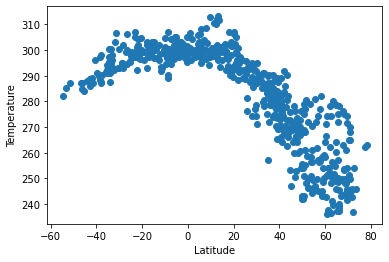

In [15]:
# Create a Scatter Plot for Latitude vs Temperature
x_values = weather_df['Lat']
y_values = weather_df['Max Temp']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.show()

## Latitude vs. Humidity Plot

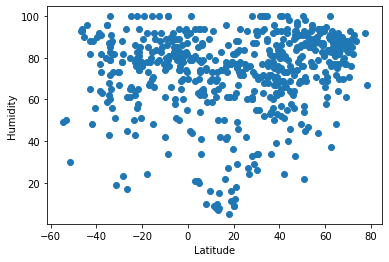

In [16]:
# Create a Scatter Plot for Latitude vs Humidity
x_values = weather_df['Lat']
y_values = weather_df['Humidity']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

## Latitude vs. Cloudiness Plot

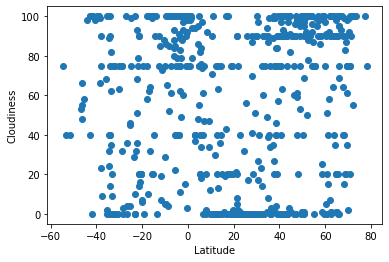

In [17]:
# Create a Scatter Plot for Latitude vs Cloudiness
x_values = weather_df['Lat']
y_values = weather_df['Cloudiness']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

## Latitude vs. Wind Speed Plot

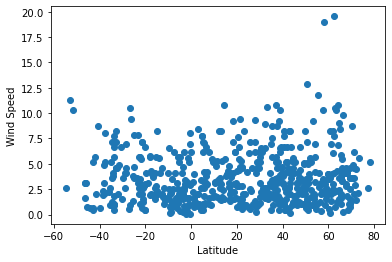

In [18]:
# Create a Scatter Plot for Latitude vs Wind Speed
x_values = weather_df['Lat']
y_values = weather_df['Wind Speed']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression